In [1]:
import matplotlib.pyplot as plt
import numpy as np
import vedo

vedo.settings.default_backend = "vtk"

In [2]:
def show(volumes: list[vedo.CommonVisual], interactive: bool = True) -> None:
    camera = dict(
        pos=(60, 5, 10),
        focal_point=(9.28146, 4.37087, 7.59946),
        viewup=(-1.26495e-3, 0.985896, -0.167357),
        roll=9.63360,
        distance=52.2753,
        clipping_range=(31.7913, 78.1866),
    )

    vedo.Plotter().show(volumes, axes=3, interactive=interactive)


def imshow(image: np.ndarray) -> None:
    _, axes = plt.subplots()

    axes.imshow(image)
    axes.axis(False)

    plt.show()


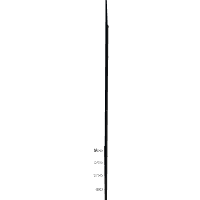

In [3]:
shape = (
    1,
    320,
    456,
)

a = np.zeros(shape=shape)

a[
    :,
    slice(shape[1] // 2, shape[1] // 2 + 2, 1),
    slice(shape[2] // 2, shape[2] // 2 + 2, 1),
] = 1

a[0, :, :] = 1
a[a.shape[0] - 1, :, :] = 1
a[:, 0, :] = 1
a[:, a.shape[1] - 1, :] = 1
a[:, :, 0] = 1
a[:, :, a.shape[2] - 1] = 1

volume = vedo.Volume(a)
volume

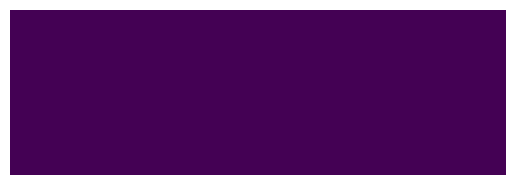


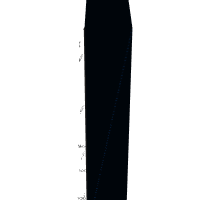

In [4]:
new_volume = volume.clone().rotate_y(10, interpolation="nearest")
imshow(new_volume.tonumpy()[:10, 10, 90:120])
new_volume


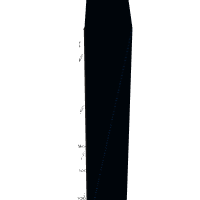

In [5]:
new_volume.tonumpy()[:] += np.where(new_volume.tonumpy() > 0, 255, 0)
new_volume.modified()
new_volume

In [6]:
show(new_volume)

Spline


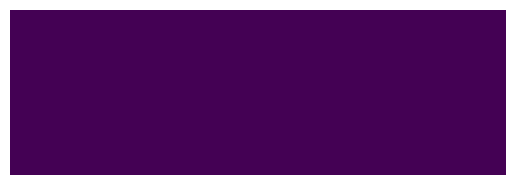


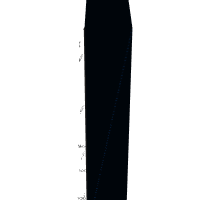

In [13]:
new_volume = volume.clone().rotate_y(10, interpolation="spline")
imshow(new_volume.tonumpy()[:10, 10, 90:120])
new_volume

In [14]:
many_rotations_volume = volume.clone()

for i in range(5):
    print(i)
    many_rotations_volume.rotate_y(10 * -1 if i % 2 else 1, interpolation="spline")

0
Spline
1
Spline
2
Spline
3
Spline
4
Spline


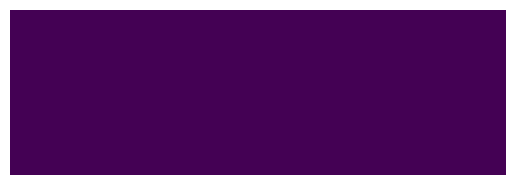


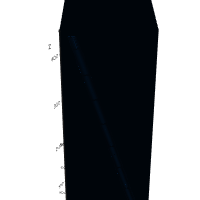

In [15]:
imshow(many_rotations_volume.tonumpy()[:10, 10, 90:120])
many_rotations_volume